# Clustering Casas

In [4]:
# Importar Dataframe
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

In [5]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
# Filtrar Dataframe con las columnas requeridas o especificadas
X = df[["Latitude", "Longitude", "MedInc"]]
X.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [9]:
# Dividir el dataset en train y test
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, train_size=0.8, random_state=42)
X_train.head()

,Latitude,Longitude,MedInc
14196,32.71,-117.03,3.2596
8267,33.77,-118.16,3.8125
17445,34.66,-120.48,4.1563
14265,32.69,-117.11,1.9425
2271,36.78,-119.80,3.5542


## Validación de número de clusters optimos

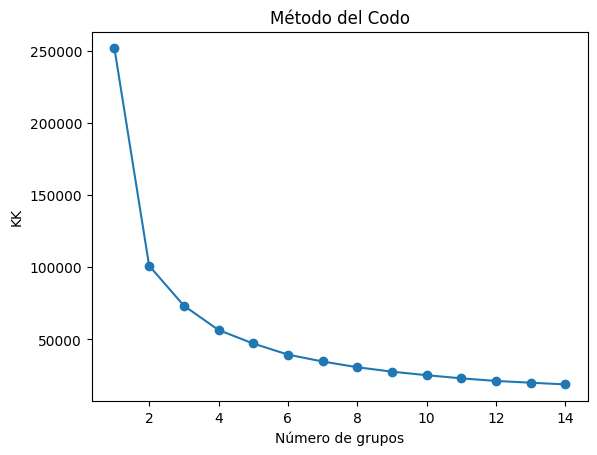

In [10]:
### Busqueda de El K
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

KK = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    KK.append(kmeans.inertia_)

# Gráfico del codo
plt.plot(range(1, 15), KK, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de grupos')
plt.ylabel('KK')
plt.show()

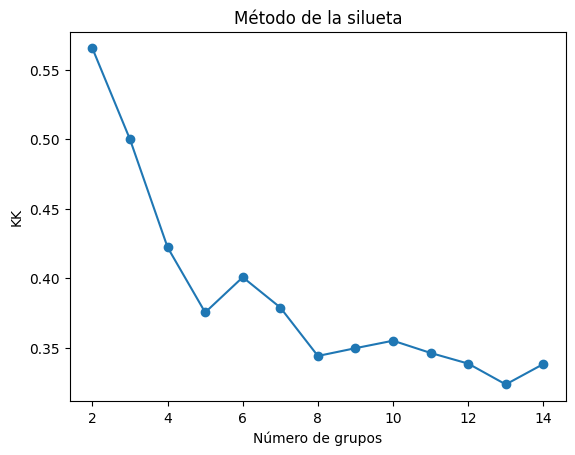

In [12]:
from sklearn.metrics import silhouette_score
from sklearn import metrics

import matplotlib.pyplot as plt

silhouette_scores = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_train)

    predict = kmeans.predict(X_train)
    silhouette_avg = metrics.silhouette_score(X_train, predict)
    silhouette_scores.append(silhouette_avg)

# Gráfico del codo
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.title('Método de la silueta')
plt.xlabel('Número de grupos')
plt.ylabel('KK')
plt.show()